In [1]:
!jt -t chesterish
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
loadpath = "./"

def getHeader(loadpath):

        header = pd.read_excel(loadpath + "no_trade.xls")
        header = header.set_index("date")
        header = header.drop(["BTI", "GSK", "ITT", "TM", "UVV"], axis=1)
        try:
            header = header.drop(["Unnamed: 0"], axis=1)
        except:
            pass

        columnNames = []
        for asset in header.columns.tolist()[:-1]:
            index = list(header.columns).index(asset)
            columnNames.append(asset + "-" + asset)
            for crossAsset in header.columns[index + 1 :].tolist():
                columnNames.append(asset + "-" + crossAsset)

        columnNames.append(header.columns[-1] + "-" + header.columns[-1])
        columnNames.sort()

        return columnNames

data = pd.read_csv(loadpath + "RVOC_6m.csv", engine="python", skiprows=[1], index_col="Var1")
data = data.drop("Unnamed: 0", axis=1)
data.columns = getHeader(loadpath)
data.index = pd.to_datetime(data.index, format="%Y%m%d")

In [3]:
series = data["AAPL-AAPL"].values
plt.rcParams["font.family"] = "Times New Roman"

/Users/lukas/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


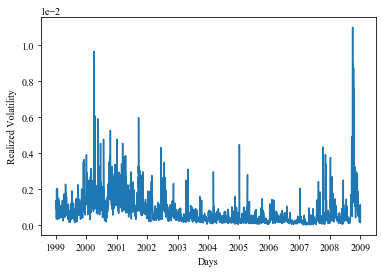

In [4]:
plt.plot(list(data.index), series)
plt.xlabel("Days")
plt.ylabel("Realized Volatility")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.show()

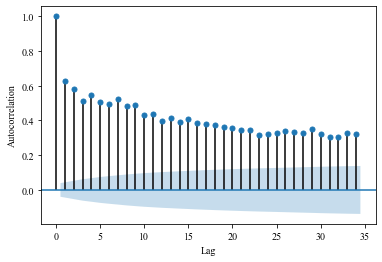

In [5]:
plot_acf(series)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("")
#plt.title("Autocorrelation Realized Daily Volatility: AAPL")
plt.show()

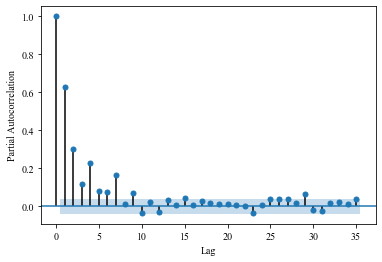

In [6]:
plot_pacf(series, lags=35)
plt.xlabel("Lag")
plt.ylabel("Partial Autocorrelation")
plt.title("")
#plt.title("Partial Autocorrelation Realized Daily Volatility: AAPL")
plt.show()